In [1]:
import tensorflow as tf

In [2]:

mnist = tf.keras.datasets.mnist

In [3]:

(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')


11490434/11490434 [==============================] - 0s 0us/step


In [4]:

x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

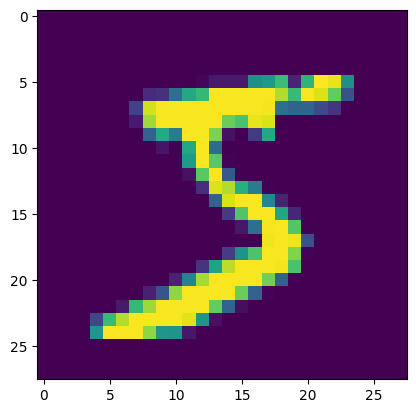

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()


In [7]:

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

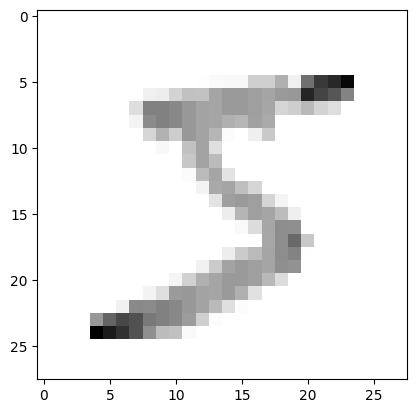

In [8]:

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)


Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [16]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 56s 36ms/step - loss: 0.2307 - accuracy: 0.9295 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 2/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0818 - val_accuracy: 0.9759
Epoch 3/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 4/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 5/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 6/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.0502 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0490 -

In [20]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
hist.history

{'loss': [0.23071470856666565,
  0.07383457571268082,
  0.052255481481552124,
  0.03770287334918976,
  0.029607659205794334,
  0.023393020033836365,
  0.017481349408626556,
  0.015100180171430111,
  0.012346030212938786,
  0.010409615002572536],
 'accuracy': [0.9294999837875366,
  0.9772083163261414,
  0.9842708110809326,
  0.9883750081062317,
  0.9909166693687439,
  0.9921875,
  0.9940208196640015,
  0.9952916502952576,
  0.9960416555404663,
  0.9963541626930237],
 'val_loss': [0.10146808624267578,
  0.08176387846469879,
  0.0671207532286644,
  0.05282141640782356,
  0.04191621392965317,
  0.05017164722084999,
  0.049020376056432724,
  0.04260287806391716,
  0.048598531633615494,
  0.053014423698186874],
 'val_accuracy': [0.9697499871253967,
  0.9759166836738586,
  0.9810000061988831,
  0.9850000143051147,
  0.9879166483879089,
  0.9862499833106995,
  0.9870833158493042,
  0.9892500042915344,
  0.9895833134651184,
  0.9890000224113464]}

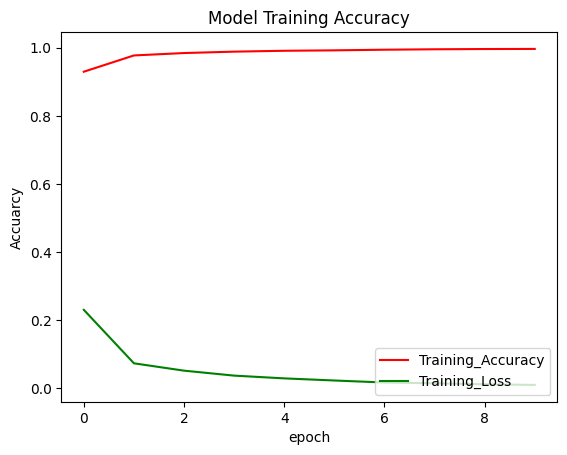

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()